In [12]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('intern.csv')  # Replace with your actual dataset filename

# Display the columns to understand the structure
print(df.columns)

# Assuming your dataset has columns like 'ProductName', 'NumReviews'
# Check the columns in your dataset
reviews_df = df[['ProductName', 'NumReviews']].dropna()

# Punctuation and Ifassage It’e


Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded'],
      dtype='object')


In [21]:
import pandas as pd

# Load product data
product_data = pd.read_csv('intern.csv')  # Replace with your actual product data filename

# Display the columns and some sample data
print("Product Data:")
print(product_data.head())

# Assuming the product_data columns are as follows:
# ProductID, ProductName, Category, Price, Rating, NumReviews, StockQuantity, Discount, Sales, DateAdded

# Display the columns and some sample data


Product Data:
   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales   DateAdded  
0             20      0.08    466  08-11-2023  
1            663      0.33   1332  26-09-2023  
2            459      0.31    252  18-10-2023  
3            475      0.49   1806  03-12-2023  
4            831      0.23   1508  08-08-2023  


In [26]:
# Simulating sentiment analysis with a placeholder column
np.random.seed(0)
sentiments = np.random.choice(['positive', 'negative'], size=len(df))
df['Sentiment'] = sentiments

# Cleaning and preprocessing (just a simulation, as there are no actual reviews in the dataset)
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['CleanedText'] = df['ProductName'].apply(clean_text)  # Using 'ProductName' as a placeholder

# Display the updated dataframe
print(df.head())


   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales   DateAdded Sentiment CleanedText  
0             20      0.08    466  08-11-2023  positive  headphones  
1            663      0.33   1332  26-09-2023  negative  headphones  
2            459      0.31    252  18-10-2023  negative  smartwatch  
3            475      0.49   1806  03-12-2023  positive  smartphone  
4            831      0.23   1508  08-08-2023  negative      laptop  


In [27]:
# Split the data into training and testing sets
X = df['CleanedText']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (800,) (800,)
Test set shape: (200,) (200,)


In [28]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the TF-IDF transformed data
print("TF-IDF features shape (Train):", X_train_tfidf.shape)
print("TF-IDF features shape (Test):", X_test_tfidf.shape)


TF-IDF features shape (Train): (800, 128)
TF-IDF features shape (Test): (200, 128)


In [29]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

# Predict sentiment on test data
predictions = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.46
              precision    recall  f1-score   support

    negative       0.53      0.45      0.49       114
    positive       0.39      0.48      0.43        86

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.47      0.46      0.46       200



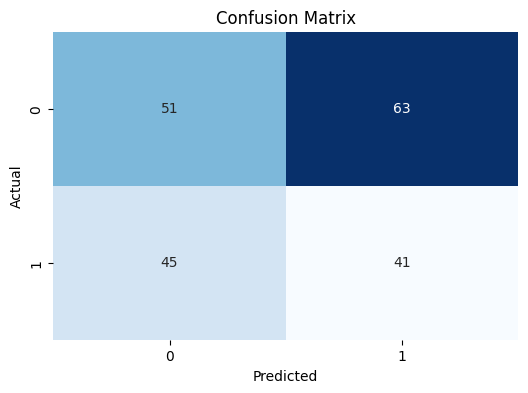

In [30]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


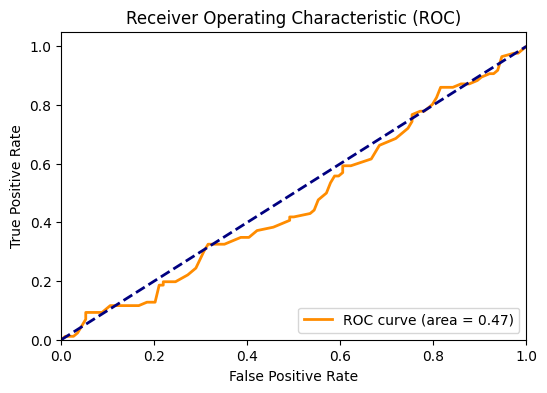

In [31]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = model.predict_proba(X_test_tfidf)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label='positive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [32]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [34]:
# Predict sentiment on test data
predictions = model.predict(X_test_tfidf)
print(predictions)


['positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negat

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='positive')
recall = recall_score(y_test, predictions, pos_label='positive')
f1 = f1_score(y_test, predictions, pos_label='positive')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.46
Precision: 0.39
Recall: 0.48
F1-score: 0.43
